# **Avaliação da qualidade do vinho**

O projeto tem como objetivo analisar e prever a qualidade do vinho com base em vários atributos químicos. O conjunto de dados utilizado é o conjunto de dados Wine, que inclui medições de diferentes propriedades químicas dos vinhos, como o teor alcoólico, ph, entre outros. O objetivo é tirar partido das técnicas de aprendizagem automática, supervisionadas para obter informações e fazer previsões.

Importar Librarias

In [28]:
# wine_classification.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import io
import graphviz
from sklearn.model_selection import cross_val_score, StratifiedKFold

Carregar Dados

In [29]:
# Load Kaggle Wine Quality dataset
wine_data = pd.read_csv('D:/_MIAA/FIA/_Proj02_M23_v11dez/winequality-red.csv')
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Tamanho dos Dados

In [30]:
#Dataset size
wine_data.shape

(1599, 12)

Estatisticas

In [31]:
#Statistics
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Tipo de Dados

In [32]:
#Data details
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Procurar Valores Nulos

In [33]:
#Search for NULL values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Visualização de Como Alguns atributos se realcionam com a Qualidade do Vinho**

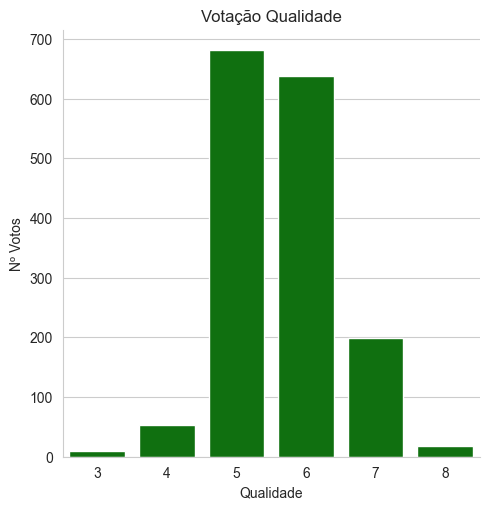

In [34]:

#Visualização Votação (qualidade)
sns.catplot(x='quality', data=wine_data, kind='count', color='green')
plt.xlabel('Qualidade')
plt.ylabel('Nº Votos')
plt.title('Votação Qualidade')
plt.show()

Text(0.5, 0, 'Qualidade')

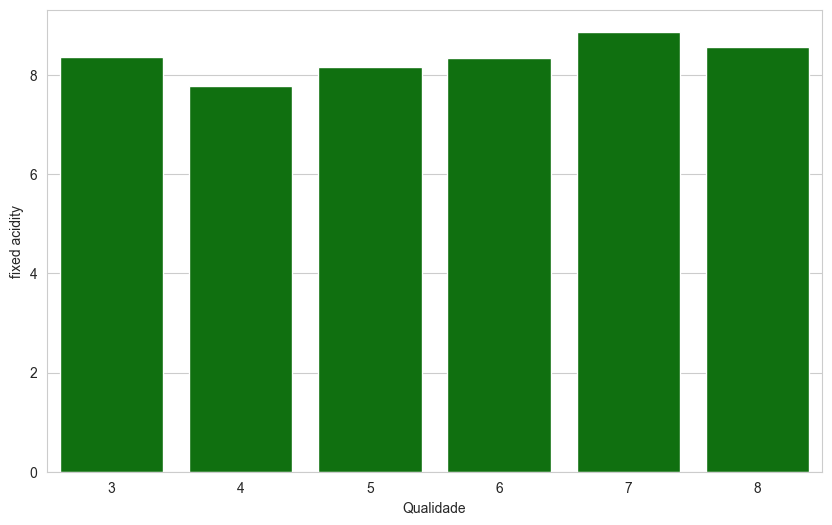

In [35]:
#Analise como "fixed acidity" influencia a  qualidade.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data, color='green', errorbar=None)
#sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data, color='green', ci=None)
plt.xlabel('Qualidade')

Text(0.5, 0, 'Qualidade')

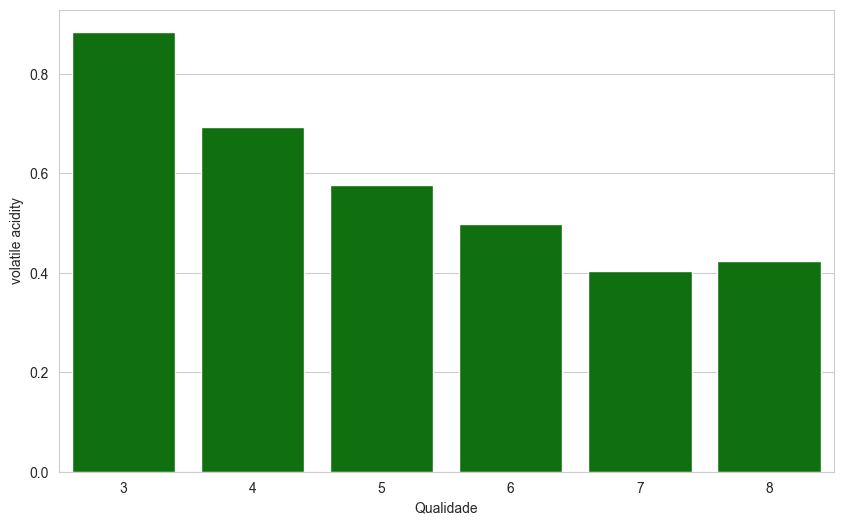

In [36]:
#Aqui podemos ver que "volatile acidity" desce quando a qualidade melhora

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data, color='green', errorbar=None)
plt.xlabel('Qualidade')

Text(0.5, 0, 'Qualidade')

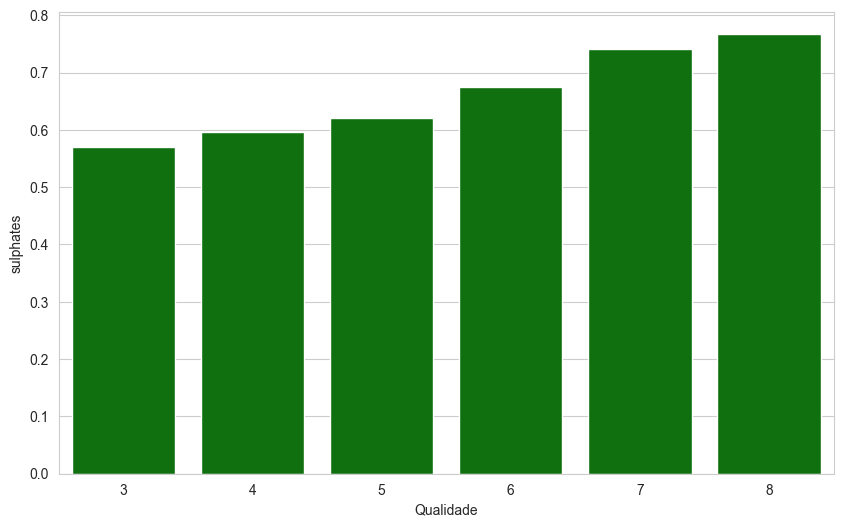

In [37]:
#Quanto maior for a qualidade maior é a quantidade de "Sulphates"
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data, color='green', errorbar=None)
plt.xlabel('Qualidade')

**Mapa de correlação**

In [38]:

#Correlation map

correlation = wine_data.corr()



<Axes: >

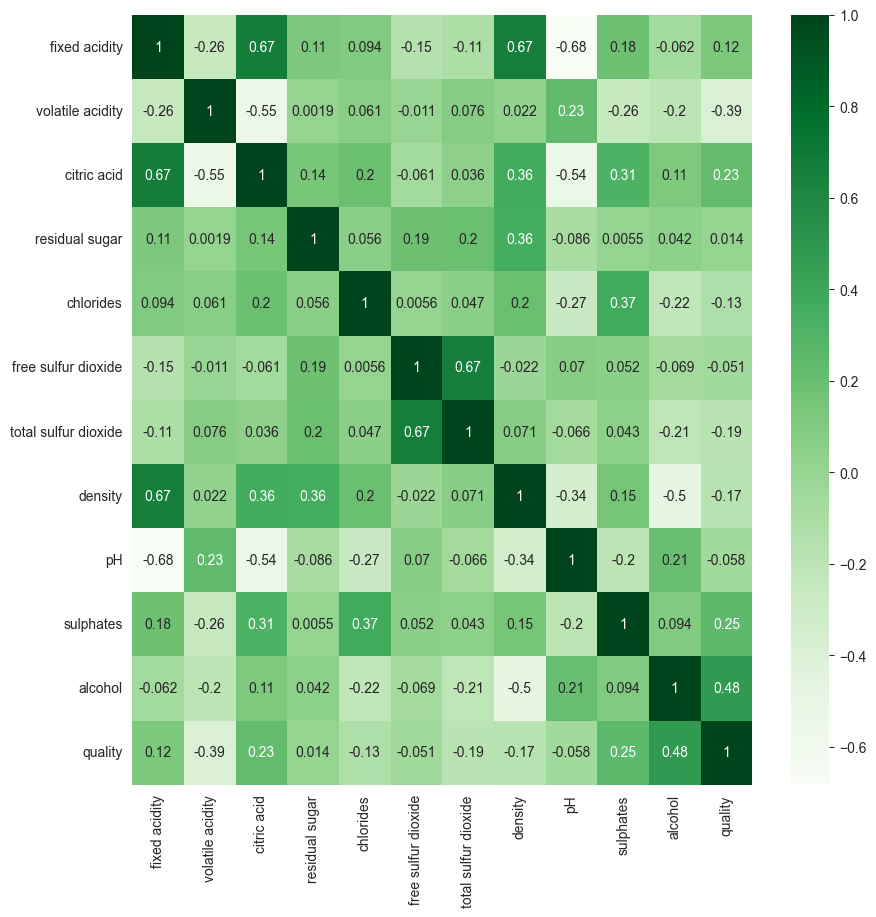

In [39]:
#Visualização Correlação
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, annot=True, cmap='Greens')

**Remover o atributo qualidade dos dados**


In [40]:
X = wine_data.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


**Definer escala de qualidade**

In [41]:
#Definir qualide como boa ou má >6 = boa e <6 = má
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
y


0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

***Random Forest Classifier***

In [42]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y.shape, y_train.shape, y_test.shape)

# Supervised Learning - Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy_rfc = accuracy_score(y_test, rf_predictions)
report = classification_report(y_test, rf_predictions, zero_division=0)

print("\nRandom Forest Accuracy:", accuracy_rfc*100)
print("Classification Report:\n", report)
from sklearn import metrics
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, rf_model.predict(X_test)))


(1599,) (1279,) (320,)

Random Forest Accuracy: 79.375
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       141
           1       0.82      0.82      0.82       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320


 Confusion Matrix:
[[108  33]
 [ 33 146]]


**Random Forest Classifier Teste**

In [43]:
#Testes Random Forest Classifier

input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# Assuming 'feature_names' is a list of your feature names
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Create a DataFrame from your input data
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = rf_model.predict(input_data_df)
print(prediction)

if (prediction[0]==1):
  print('Vinho de Boa Qualidade')
else:
  print('Vinho de Má Qualidade')

[0]
Vinho de Má Qualidade


**Stochastic Gradient Decent Classifier**

In [44]:
#Ajustar Dados

X = wine_data.drop('quality', axis=1)
X.head()

#Definir qualide como boa ou má >6 = boa e <6 = má

y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
y

# Supervised Learning - Stochastic Gradient Decent Classifier

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(y.shape, y_train.shape, y_test.shape)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test, pred_sgd)

print("\nStochastic Gradient Decent Classifier:", accuracy_sgd*100)
print(classification_report(y_test, pred_sgd, zero_division=1))
from sklearn import metrics
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, rf_model.predict(X_test)))

(1599,) (1279,) (320,)

Stochastic Gradient Decent Classifier: 73.75
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       141
           1       0.81      0.70      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320


 Confusion Matrix:
[[108  33]
 [ 33 146]]


**Stochastic Gradient Decent Classifier Teste**

In [45]:
#Testes Stochastic Gradient Decent Classifier

#input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) #Má Qualidade
input_data = (7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# Assuming 'feature_names' is a list of your feature names
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Create a DataFrame from your input data
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = rf_model.predict(input_data_df)
print(prediction)

if (prediction[0]==1):
  print('Vinho de Boa Qualidade')
else:
  print('Vinho de Má Qualidade')

[1]
Vinho de Boa Qualidade


**Support Vector Classifier**

In [46]:
#Ajustar Dados

X = wine_data.drop('quality', axis=1)
X.head()

#Definir qualide como boa ou má >6 = boa e <6 = má

y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
y


# Supervised Learning - Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(y.shape, y_train.shape, y_test.shape)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, pred_svc)

print("\nSupport Vector Classifier:", accuracy_svc*100)
print(classification_report(y_test, pred_svc, zero_division=1))
from sklearn import metrics
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, rf_model.predict(X_test)))


(1599,) (1279,) (320,)

Support Vector Classifier: 63.74999999999999
              precision    recall  f1-score   support

           0       0.68      0.34      0.45       141
           1       0.63      0.87      0.73       179

    accuracy                           0.64       320
   macro avg       0.65      0.61      0.59       320
weighted avg       0.65      0.64      0.61       320


 Confusion Matrix:
[[108  33]
 [ 33 146]]


**Support Vector Classifier Teste**

In [47]:
#Testes Support Vector Classifier

#input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) #Má Qualidade
input_data = (7.3,0.66,0.00,1.1,0.065,15.0,21.0,0.9936,3.49,0.47,10.1)

# Assuming 'feature_names' is a list of your feature names
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Create a DataFrame from your input data
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = rf_model.predict(input_data_df)
print(prediction)

if (prediction[0]==1):
  print('Vinho de Boa Qualidade')
else:
  print('Vinho de Má Qualidade')

[1]
Vinho de Boa Qualidade


In [48]:
#Ajustar Dados

X = wine_data.drop('quality', axis=1)
X.head()

#Definir qualide como boa ou má >6 = boa e <6 = má

y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
y

#KNN  Algorithm

modell = KNeighborsClassifier(n_neighbors = 5)
modell.fit(X_train, y_train)

pred_knn = modell.predict(X_test)

# Evaluate the model
accuracy_Knn = accuracy_score(y_test, pred_knn)

print("\nKNN Algorithm:", accuracy_Knn*100)
print(classification_report(y_test, pred_knn, zero_division=1))

from sklearn import metrics
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, rf_model.predict(X_test)))


KNN Algorithm: 61.25000000000001
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       141
           1       0.66      0.64      0.65       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320


 Confusion Matrix:
[[108  33]
 [ 33 146]]


**KNN Algorithm Teste**

In [49]:
#Testes KNN Algorithm

#input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) #Má Qualidade
input_data = (5.3,0.46,0.00,1.2,0.065,16.0,21.0,0.9836,3.59,0.47,10.1)

# Assuming 'feature_names' is a list of your feature names
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Create a DataFrame from your input data
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = rf_model.predict(input_data_df)
print(prediction)

if (prediction[0]==1):
  print('Vinho de Boa Qualidade')
else:
  print('Vinho de Má Qualidade')

[1]
Vinho de Boa Qualidade


**Comparação dos Modelos**

In [50]:
#Comparação dos Algoritmos

models = {
    "models": ['Random Forest Classifier','Stochastic Gradient Decent Classifier','Support Vector Classifier','KNN Algorithm'],
    "score": [accuracy_rfc, accuracy_sgd, accuracy_svc, accuracy_Knn]
}
models

{'models': ['Random Forest Classifier',
  'Stochastic Gradient Decent Classifier',
  'Support Vector Classifier',
  'KNN Algorithm'],
 'score': [0.79375, 0.7375, 0.6375, 0.6125]}

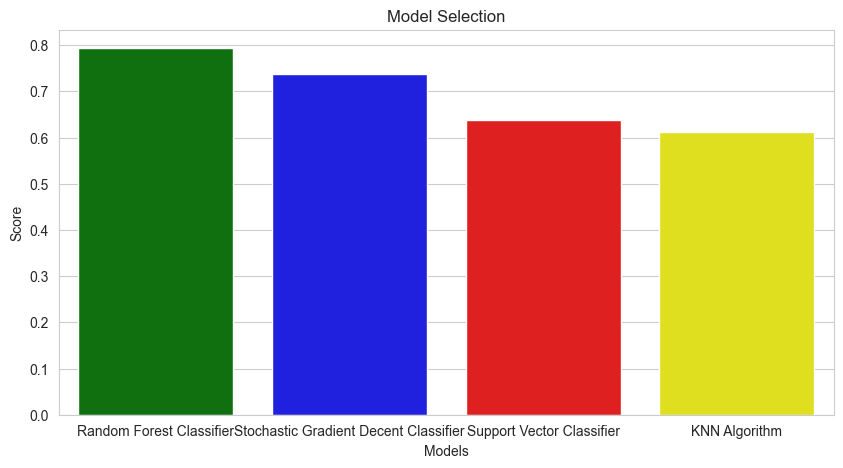

In [51]:
#Visualizar Comparação dos Algoritmos

colors = ['green', 'blue', 'red', 'yellow']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=models['models'], y=models['score'], hue=models['models'], palette=colors, legend=False)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

plt.show()

**Analisando mais alguns detalhes dos dados usando Random Forest Classifier**


Feature Importances:
alcohol                 0.177292
sulphates               0.140139
volatile acidity        0.109993
total sulfur dioxide    0.101771
density                 0.093635
chlorides               0.068420
pH                      0.066250
citric acid             0.064475
fixed acidity           0.064277
free sulfur dioxide     0.058220
residual sugar          0.055528
dtype: float64


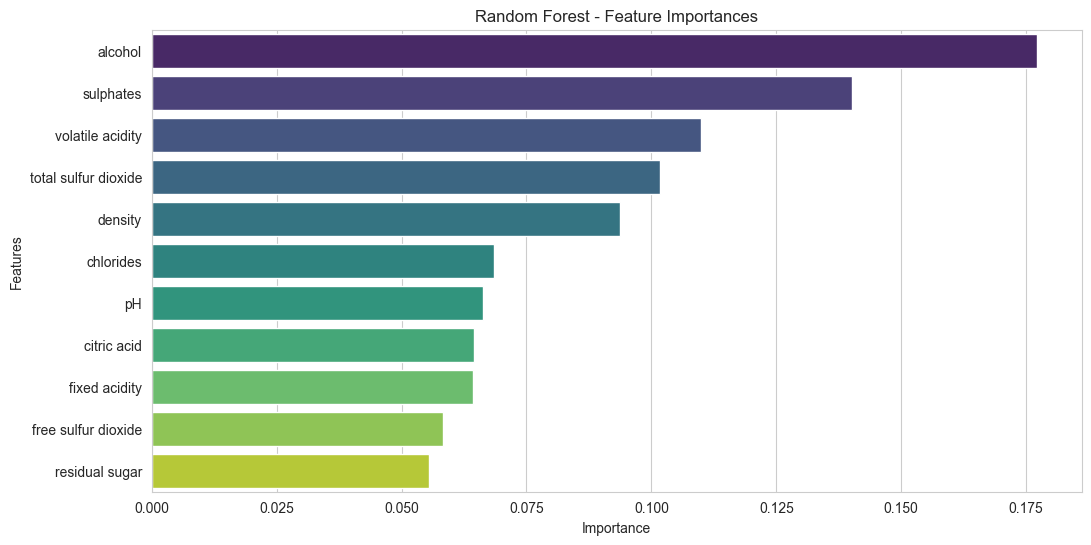

In [52]:
# Feature Importances in wine quality dataset

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Print and Visualize Feature Importances
print("\nFeature Importances:")
print(sorted_feature_importances)

# Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, hue=sorted_feature_importances.index, palette="viridis", legend=False)
plt.title('Random Forest - Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [53]:
# Visualize one of the decision trees in the forest
estimator = rf_model.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns, class_names=[str(i) for i in range(3)],
                           rounded=True, filled=True)
graph = graphviz.Source(dot_data)

# Save the decision tree as an image file (optional)
graph.render(filename='tree', format='png', cleanup=True)

# Display the decision tree using graphviz
graph.view()


'tree.pdf'

In [54]:
# Melhorar o modelo Random Forest Classifier

# Split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest Classifier
#rf_model = RandomForestClassifier()

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='accuracy')

# Print cross-validation results
print("\n\nCross-Validation Results (Accuracy):")
print(cv_results)
print("Mean Accuracy: {:.2f}%".format(np.mean(cv_results) * 100)) ###copiar para os outros modelos também...
print("Standard Deviation: {:.2f}%".format(np.std(cv_results) * 100))

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_rfc = accuracy_score(y_test, rf_predictions)
report = classification_report(y_test, rf_predictions, zero_division=0)

print("\nRandom Forest Accuracy:", accuracy_rfc*100)
print("Classification Report:\n", report)
print("\n Confusion Matrix:")
print(metrics.confusion_matrix(y_test, rf_model.predict(X_test)))

############################################################################################################
# Visualize one of the decision trees in the forest
#Nova arvore
estimator = rf_model.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns, class_names=[str(i) for i in range(3)],
                           rounded=True, filled=True)
graph = graphviz.Source(dot_data)

# Save the decision tree as an image file (optional)
graph.render(filename='tree', format='png', cleanup=True)

# Display the decision tree using graphviz
graph.view()



Cross-Validation Results (Accuracy):
[0.8046875  0.8359375  0.74609375 0.80859375 0.80784314]
Mean Accuracy: 80.06%
Standard Deviation: 2.95%

Random Forest Accuracy: 79.0625
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320


 Confusion Matrix:
[[107  34]
 [ 33 146]]


'tree.pdf'

# *Conclusão/Análise*

A análise inclui visualizações de como as características químicas específicas (por exemplo, acidez fixa, acidez volátil, sulfatos) se relacionam com a qualidade do vinho.
Através dos gráficos de barras podemos facilemnte vizualizar as diferentes características em todos os níveis de qualidade do vinho (por exemplo, acidez fixa vs. qualidade) e fornecem informações sobre como cada caraterística pode afetar a qualidade percebida do vinho.

*Visualização da distribuição das classes:*

O mapa de correlação visualiza as relações entre diferentes características, ajudando a identificar potenciais padrões e correlações.
Os gráficos de barras também mostram como certas características variam em diferentes níveis de qualidade, fornecendo um vislumbre de potenciais grupos ou tendências.
A análise sugere que certas características, como a acidez volátil, tendem a diminuir com a melhoria da qualidade do vinho.
O mapa de correlação pode fornecer informações sobre que características estão mais fortemente correlacionadas entre si e podem contribuir para a qualidade geral do vinho.

*Recomendações:*

Importância das características:
O classificador Random Forest é utilizado para identificar a importância das características. As importâncias das características e o gráfico de barras podem orientar recomendações para melhorar a qualidade do vinho.
o Por exemplo, se certas características contribuem mais para a qualidade, os vinicultores podem concentrar-se na otimização dessas características durante a produção.

*Visualização da árvore de decisão:*

A visualização da árvore de decisão pode fornecer informações detalhadas sobre as condições específicas em que os vinhos são classificados como de boa ou má qualidade.
Os vinicultores podem utilizar estes conhecimentos para compreender os limiares críticos de cada caraterística que contribuem para classificações de alta ou baixa qualidade.

*Avaliação e validação do modelo:*

Métricas de avaliação:
A análise inclui as principais métricas de avaliação, como a exatidão, a precisão, a recuperação e a pontuação F1 para cada modelo (Random Forest, Stochastic Gradient Descent, Support Vetor Classifier, KNN).
As matrizes de confusão fornecem uma análise detalhada das previsões correctas e incorrectas.

*Melhoria da precisão do modelo Random Forest Classifier*

Usando "k-fold cross-validation" pretende se melhorar os resultados obtidos pelo Random Forest Classifier.
Como o dataset já se encontra bem estruturado a melhoria foi residual, obtemos uma melhoria de 78% de precisão para 79%.

Se aumentarmos o tamanho do dataset, algoritmo de qualificação melhora a precisão dos resultados.

